In [11]:
import pandas as pd
import matplotlib.pyplot as plt

import pymc3 as pm
import arviz as az
import numpy as np

import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

kwargs_sampler = {'chains': 4,'cores': 4}#, 'return_inferencedata': True}

plt.style.use('seaborn-darkgrid')

In [19]:
mu_x = np.linspace(70, 280, 200)
mu_y = stats.norm(160, 5).pdf(mu_x)

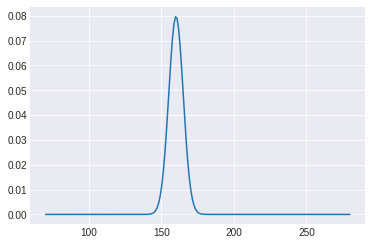

In [20]:
plt.plot(mu_x,mu_y)

In [21]:
sigma_x = np.linspace(0, 60, 200)
sigma_y = stats.halfnorm.pdf(sigma_x, scale=20)

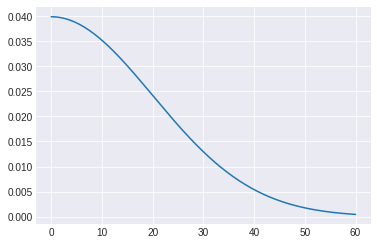

In [22]:
plt.plot(sigma_x,sigma_y)

In [23]:
s = np.random.normal(180, 10, 35)
print(np.mean(s))

180.44516046402563


<AxesSubplot:>

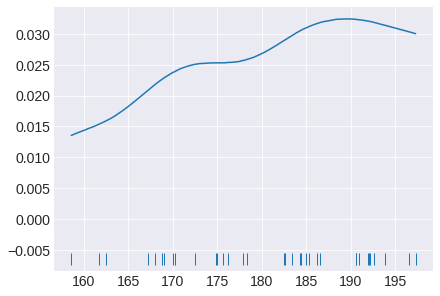

In [24]:
az.plot_kde(s,rug=True)

In [25]:
with pm.Model() as normal_model:
    
    mu = pm.Normal('mu', mu=170, sigma=30)
    sigma = pm.HalfNormal('sigma', sigma=20)
    
    y = pm.Normal('y',mu=mu,sigma=sigma,observed=s)

INFO (theano.gof.compilelock): Waiting for existing lock by process '88' (I am process '29')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/jovyan/.theano/compiledir_Linux-4.19-linuxkit-x86_64-with-glibc2.10-x86_64-3.8.6-64/lock_dir


KeyboardInterrupt: 

In [ ]:
with normal_model:
    # Sample from the model
    trace_nm = pm.sample(**kwargs_sampler)

In [ ]:
az.plot_trace(trace_nm)

In [ ]:
az.plot_posterior(trace_nm, var_names=['mu'])

In [ ]:
# Predict observations from the model by posterior predictive sampling
with normal_model:
    ppc_nm = pm.sample_posterior_predictive(trace_nm, random_seed=58)

<AxesSubplot:xlabel='y'>

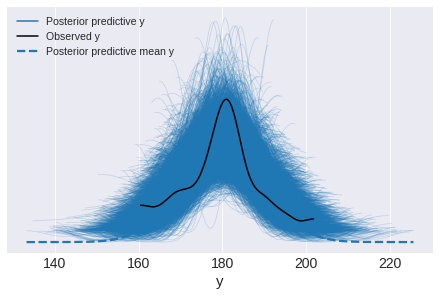

In [63]:
# Alternatively we can use the plot the conditional distribution of y
idata = az.from_pymc3(trace_nm, posterior_predictive=ppc_nm)
az.plot_ppc(idata)